In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2, VGG16
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from keras.regularizers import l2
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Conv2D,  MaxPooling2D, ZeroPadding2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
from keras.layers import BatchNormalization
import cv2
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import numpy as np
from utils.plot_history import plot_history

#TESTES

# 32, 64 / com dropout -- model 3



In [ ]:
def compile_model(input_shape, alpha): #CRIE SEU PRÓPRIO MODELO AQUI
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5,5), padding="same", activation = "relu", input_shape = input_shape))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(64, (5,5), padding="same", activation = "relu"))
  model.add(layers.MaxPooling2D((2,2)))
  
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid'))

  opt = Adam(learning_rate=alpha)

  model.summary()
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['acc'])
      
  print("Modelo Compilado...")
  return model

def data_augment(batch_size, input_shape): #Gerando novas imagens com rotações e zooms para incrementar o treino.
  image_gen = ImageDataGenerator(rotation_range= 40, rescale = 1/255, horizontal_flip= True, vertical_flip=True)

  train_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  validation_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/validation', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  test_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

  return train_images, validation_images, test_images

def create_callbacks(alpha): #Callbacks para serem aplicados no treino
  filepath="model_one.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=alpha, patience=5, verbose=1)
  erl_stopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1)

  callbacks = [checkpoint, lr_reduce, erl_stopping]
  return callbacks
  
def train_Model(): #Funcão para treinar o modelo
  batch_size   = 32
  alpha        = 1e-3
  epoch        = 30
  input_shape  = (200, 200, 3)

  model = compile_model(input_shape, alpha)
  print("Criando Array de callbacks")
  callbacks = create_callbacks(alpha)
  print("Criando data augmentator")
  train_images, validation_images, test_images = data_augment(batch_size, input_shape)
  
  print("Iniciando treino do Modelo...")
  history = model.fit(
                              train_images,
                              validation_data=validation_images,
                              callbacks=callbacks,
                              epochs=epoch)
                              
  model.evaluate(test_images)

  return history, model

history1, model1 = train_Model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               20480128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

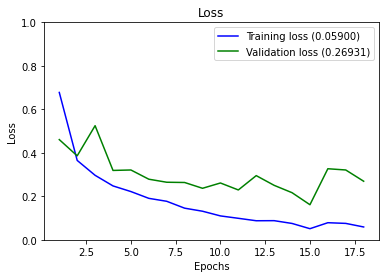

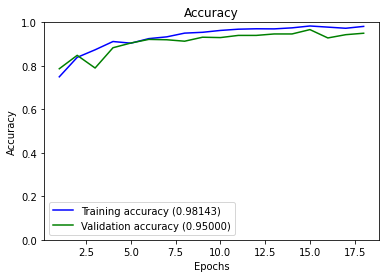

In [ ]:
plot_history(history1)

# model 1

In [ ]:
def compile_model(input_shape, alpha): #CRIE SEU PRÓPRIO MODELO AQUI
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), padding="same", activation = "relu", input_shape = input_shape))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(64, (3,3), padding="same", activation = "relu"))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(128, (3,3), padding="same", activation = "relu"))
  model.add(layers.MaxPooling2D((2,2)))
  
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid'))

  opt = Adam(learning_rate=alpha)

  model.summary()
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['acc'])
      
  print("Modelo Compilado...")
  return model

def data_augment(batch_size, input_shape): #Gerando novas imagens com rotações e zooms para incrementar o treino.
  image_gen = ImageDataGenerator(rotation_range= 40, rescale = 1/255, horizontal_flip= True, vertical_flip=True)

  train_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  validation_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/validation', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  test_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

  return train_images, validation_images, test_images

def create_callbacks(alpha): #Callbacks para serem aplicados no treino
  filepath="model_one.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=alpha, patience=5, verbose=1)
  erl_stopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1)

  callbacks = [checkpoint, lr_reduce, erl_stopping]
  return callbacks
  
def train_Model(): #Funcão para treinar o modelo
  batch_size   = 32
  alpha        = 1e-3
  epoch        = 30
  input_shape  = (200, 200, 3)

  model = compile_model(input_shape, alpha)
  print("Criando Array de callbacks")
  callbacks = create_callbacks(alpha)
  print("Criando data augmentator")
  train_images, validation_images, test_images = data_augment(batch_size, input_shape)
  
  print("Iniciando treino do Modelo...")
  history = model.fit(
                              train_images,
                              validation_data=validation_images,
                              callbacks=callbacks,
                              epochs=epoch)
                              
  model.evaluate(test_images)

  return history, model

history2, model2 = train_Model()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 80000)           

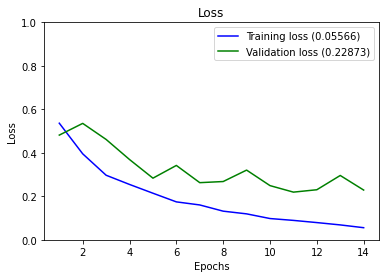

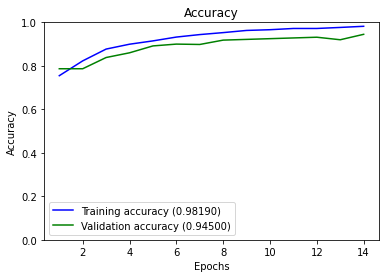

In [ ]:
plot_history(history2)

# 16, 32 / Model 2

In [ ]:
def compile_model(input_shape, alpha): #CRIE SEU PRÓPRIO MODELO AQUI
  model = models.Sequential()

  model.add(layers.Conv2D(16, (5,5), padding="same", activation = "relu", input_shape = input_shape))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(32, (5,5), padding="same", activation = "relu"))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation = "relu"))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation = "sigmoid"))

  opt = Adam(learning_rate=alpha)

  model.summary()
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['acc'])
      
  print("Modelo Compilado...")
  return model

def data_augment(batch_size, input_shape): #Gerando novas imagens com rotações e zooms para incrementar o treino.
  image_gen = ImageDataGenerator(rotation_range= 40, rescale = 1/255, horizontal_flip= True, vertical_flip=True)

  train_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  validation_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/validation', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  test_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

  return train_images, validation_images, test_images

def create_callbacks(alpha): #Callbacks para serem aplicados no treino
  filepath="model_one.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=alpha, patience=5, verbose=1)
  erl_stopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1)

  callbacks = [checkpoint, lr_reduce, erl_stopping]
  return callbacks
  
def train_Model(): #Funcão para treinar o modelo
  batch_size   = 32
  alpha        = 1e-3
  epoch        = 30
  input_shape  = (200, 200, 3)

  model = compile_model(input_shape, alpha)
  print("Criando Array de callbacks")
  callbacks = create_callbacks(alpha)
  print("Criando data augmentator")
  train_images, validation_images, test_images = data_augment(batch_size, input_shape)
  
  print("Iniciando treino do Modelo...")
  history = model.fit(
                              train_images,
                              validation_data=validation_images,
                              callbacks=callbacks,
                              epochs=epoch)
                              
  model.evaluate(test_images)

  return history, model

history4, model4 = train_Model()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 200, 200, 16)      1216      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 100, 100, 32)      12832     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 80000)             0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               10240128  
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)             

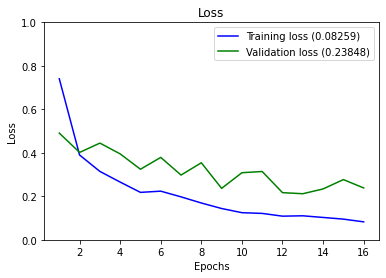

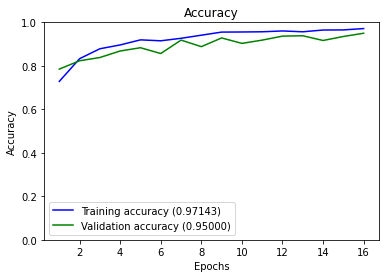

In [ ]:
plot_history(history4)

# Model 4

In [ ]:
def compile_model(input_shape, alpha): #CRIE SEU PRÓPRIO MODELO AQUI
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5,5), padding="same", activation = "relu", input_shape = input_shape))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(64, (5,5), padding="same", activation = "relu"))
  model.add(layers.MaxPooling2D((2,2)))
  
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid'))

  opt = Adam(learning_rate=alpha)

  model.summary()
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['acc'])
      
  print("Modelo Compilado...")
  return model

def data_augment(batch_size, input_shape): #Gerando novas imagens com rotações e zooms para incrementar o treino.
  image_gen = ImageDataGenerator(rotation_range= 40, rescale = 1/255, horizontal_flip= True, vertical_flip=True)

  train_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  validation_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/validation', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  test_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

  return train_images, validation_images, test_images

def create_callbacks(alpha): #Callbacks para serem aplicados no treino
  filepath="model_one.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=alpha, patience=5, verbose=1)
  erl_stopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1)

  callbacks = [checkpoint, lr_reduce, erl_stopping]
  return callbacks
  
def train_Model(): #Funcão para treinar o modelo
  batch_size   = 64
  alpha        = 1e-3
  epoch        = 30
  input_shape  = (200, 200, 3)

  model = compile_model(input_shape, alpha)
  print("Criando Array de callbacks")
  callbacks = create_callbacks(alpha)
  print("Criando data augmentator")
  train_images, validation_images, test_images = data_augment(batch_size, input_shape)
  
  print("Iniciando treino do Modelo...")
  history = model.fit(
                              train_images,
                              validation_data=validation_images,
                              callbacks=callbacks,
                              epochs=epoch)
                              
  model.evaluate(test_images)

  return history, model

history1, model1 = train_Model()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 160000)            0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               20480128  
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)             

# Model 5

In [ ]:
def compile_model(input_shape, alpha): #CRIE SEU PRÓPRIO MODELO AQUI
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5,5), padding="same", activation = "relu", input_shape = input_shape))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(64, (5,5), padding="same", activation = "relu"))
  model.add(layers.MaxPooling2D((2,2)))
  
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid'))

  opt = Adam(learning_rate=alpha)

  model.summary()
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['acc'])
      
  print("Modelo Compilado...")
  return model

def data_augment(batch_size, input_shape): #Gerando novas imagens com rotações e zooms para incrementar o treino.
  image_gen = ImageDataGenerator(rotation_range= 40, rescale = 1/255, horizontal_flip= True, vertical_flip=True)

  train_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  validation_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/validation', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  test_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

  return train_images, validation_images, test_images

def create_callbacks(alpha): #Callbacks para serem aplicados no treino
  filepath="model_one.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=alpha, patience=5, verbose=1)
  erl_stopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1)

  callbacks = [checkpoint, lr_reduce, erl_stopping]
  return callbacks
  
def train_Model(): #Funcão para treinar o modelo
  batch_size   = 16
  alpha        = 1e-3
  epoch        = 30
  input_shape  = (200, 200, 3)

  model = compile_model(input_shape, alpha)
  print("Criando Array de callbacks")
  callbacks = create_callbacks(alpha)
  print("Criando data augmentator")
  train_images, validation_images, test_images = data_augment(batch_size, input_shape)
  
  print("Iniciando treino do Modelo...")
  history = model.fit(
                              train_images,
                              validation_data=validation_images,
                              callbacks=callbacks,
                              epochs=epoch)
                              
  model.evaluate(test_images)

  return history, model

history1, model1 = train_Model()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 160000)            0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               20480128  
_________________________________________________________________
dropout_39 (Dropout)         (None, 128)             

In [ ]:
def compile_model(input_shape, alpha): #CRIE SEU PRÓPRIO MODELO AQUI
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5,5), padding="same", activation = "relu", input_shape = input_shape))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(64, (5,5), padding="same", activation = "relu"))
  model.add(layers.MaxPooling2D((2,2)))
  
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid'))

  opt = SGD(learning_rate=alpha)

  model.summary()
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['acc'])
      
  print("Modelo Compilado...")
  return model

def data_augment(batch_size, input_shape): #Gerando novas imagens com rotações e zooms para incrementar o treino.
  image_gen = ImageDataGenerator(rotation_range= 40, rescale = 1/255, horizontal_flip= True, vertical_flip=True)

  train_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  validation_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/validation', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  test_images = image_gen.flow_from_directory('drive/MyDrive/DATASET-10-70-20/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

  return train_images, validation_images, test_images

def create_callbacks(alpha): #Callbacks para serem aplicados no treino
  filepath="model_one.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=alpha, patience=5, verbose=1)
  erl_stopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1)

  callbacks = [checkpoint, lr_reduce, erl_stopping]
  return callbacks
  
def train_Model(): #Funcão para treinar o modelo
  batch_size   = 32
  alpha        = 1e-3
  epoch        = 30
  input_shape  = (200, 200, 3)

  model = compile_model(input_shape, alpha)
  print("Criando Array de callbacks")
  callbacks = create_callbacks(alpha)
  print("Criando data augmentator")
  train_images, validation_images, test_images = data_augment(batch_size, input_shape)
  
  print("Iniciando treino do Modelo...")
  history = model.fit(
                              train_images,
                              validation_data=validation_images,
                              callbacks=callbacks,
                              epochs=epoch)
                              
  model.evaluate(test_images)

  return history, model

history1, model1 = train_Model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               20480128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              